# Generating missing values in tabular data

This tutorial shows how to generate missing values on pre-existing tabular data and to visualize both the original and the transformed data




In [1]:
from sklearn.datasets import load_iris
from badgers.transforms.tabular_data.missingness import MissingCompletelyAtRandom, DummyMissingNotAtRandom, DummyMissingAtRandom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def plot_missing(X, y, Xt, target_names, feature_names):
    """
    Some utility function to generate the plots
    """
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))
    for label in range(len(target_names)):
        ix = np.where(y == label)
        axes[0].scatter(X[ix,0],X[ix,1], c = f'C{label}', label = target_names[label])
        axes[1].scatter(Xt[ix,0],Xt[ix,1],c = f'C{label}', label = target_names[label])
    # plot missing values
    missing_mask = np.isnan(Xt).any(axis=1)
    axes[1].scatter(X[missing_mask][:,0],X[missing_mask][:,1],marker='x', color='black', label = 'missing')
    axes[0].set_title('Original')
    axes[1].set_title('Transformed')
    axes[0].set_xlabel(feature_names[0], fontsize=10)
    axes[1].set_xlabel(feature_names[0], fontsize=10)
    axes[0].set_ylabel(feature_names[1], fontsize=10)
    axes[1].set_ylabel(feature_names[1], fontsize=10)
    axes[0].legend()
    axes[1].legend()
    return fig, axes


## Load and prepare data

We first load an existing dataset from `sklearn.datasets`

In [3]:
data = load_iris()

X = data['data']
y = data['target']

## Generate missing values

Missing value mechanisms are usually categorized as *missing completely at random* (MCAR), 
*missing at random* (MAR), and *missing not at random* (MNAR).

### Missing completely at random (MCAR)

The transformer simply replaces values (row, col) with `np.nan` independently at random.

In [4]:
trf = MissingCompletelyAtRandom(percentage_missing=25)
Xt = trf.transform(X.copy())

In [5]:
pd.DataFrame(Xt).head()

,0,1,2,3
0,NaN,3.5,1.4,0.2
1,NaN,3.0,1.4,NaN
2,4.7,3.2,NaN,0.2
3,NaN,3.1,1.5,NaN
4,NaN,3.6,1.4,0.2


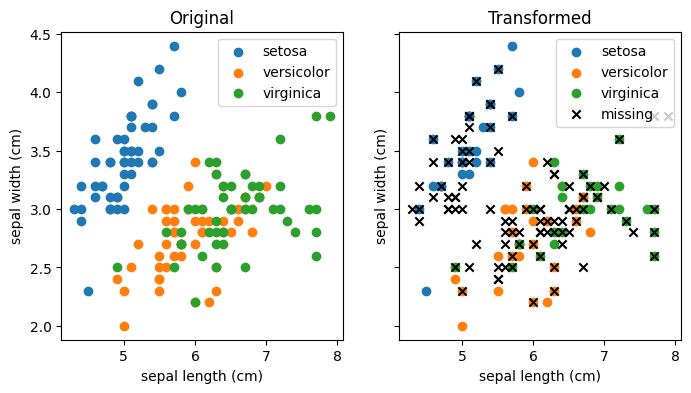

In [6]:
fig, axes = plot_missing(X, y, Xt, data['target_names'], data['feature_names'])

### Missing at random (MAR)

Missing not at random means that the fact that a value is missing correlates with some other features.

The DummyMissingAtRandom transformer replaces a value (row,col) with `np.nan` depending upon another feature chosen randomly. The probability of missingness depends linearly on the other chosen feature.

In [7]:
trf = DummyMissingAtRandom(percentage_missing=25)
Xt = trf.transform(X.copy())

In [8]:
pd.DataFrame(Xt).head()

,0,1,2,3
0,NaN,3.5,1.4,0.2
1,NaN,3.0,1.4,NaN
2,NaN,3.2,NaN,0.2
3,NaN,3.1,1.5,0.2
4,5.0,NaN,1.4,NaN


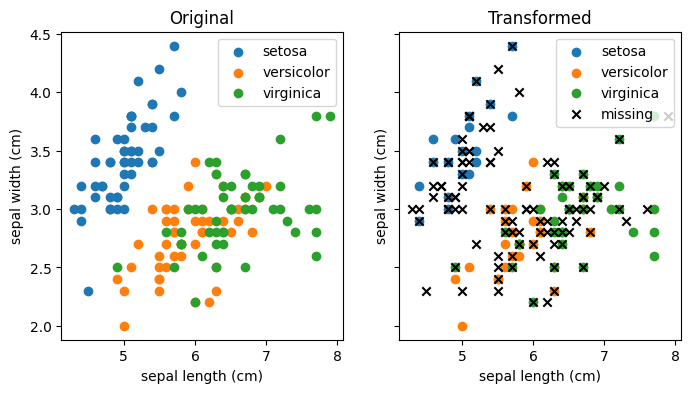

In [9]:
fig, axes = plot_missing(X, y, Xt, data['target_names'], data['feature_names'])

### Missing not at random (MNAR)

Missing not at random means that the value that is missing depends on its own value had it not been missing.

The DummyMissingNotAtRandom simply replaces a value with `np.nan` with a probability proportional to the original value.

In [10]:
trf = DummyMissingNotAtRandom(percentage_missing=25)
Xt = trf.transform(X.copy())

In [11]:
pd.DataFrame(Xt).head()

,0,1,2,3
0,NaN,3.5,1.4,NaN
1,NaN,3.0,NaN,0.2
2,NaN,3.2,NaN,0.2
3,NaN,3.1,NaN,NaN
4,NaN,3.6,1.4,0.2


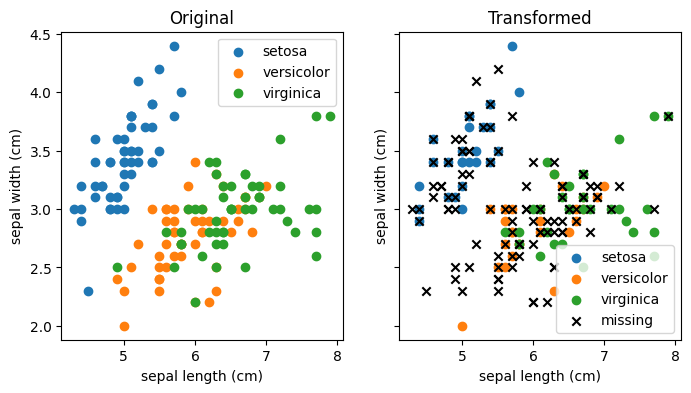

In [12]:
fig, axes = plot_missing(X, y, Xt, data['target_names'], data['feature_names'])